In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
current_directory = os.getcwd()

In [4]:
df_train = pd.read_csv(os.path.join(current_directory, 'data', 'train_data.csv'), usecols = ['ID','fw','a','c/b','a^2'])

In [5]:
df_train

,a,fw,ID,c/b,a^2
0,0.35,1.135007,0.0,0.50,0.1225
1,0.65,1.093783,0.0,0.10,0.4225
2,0.30,1.055009,0.0,0.10,0.0900
3,0.25,1.061839,0.0,0.25,0.0625
4,0.35,1.094954,0.0,0.35,0.1225
...,...,...,...,...,...
770860,0.75,1.115840,3.0,0.30,0.5625
770861,0.55,1.111252,3.0,0.30,0.3025
770862,0.35,1.070369,3.0,0.20,0.1225
770863,0.50,1.080332,3.0,0.10,0.2500


In [6]:
df_train = df_train[df_train['ID'] == 1]

In [7]:
generations = range(0,100)

In [8]:
df_train.loc[:,'equation_1'] = 1
df_train.loc[:,'equation_2'] = 1 + (df_train['a^2'])*(1-df_train['a^2'])
df_train.loc[:,'equation_3'] = (-1/2) * (-2-df_train['c/b'])

C:\Users\Prasanna Koirala\AppData\Local\Temp\ipykernel_15332\1262279311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,'equation_1'] = 1
C:\Users\Prasanna Koirala\AppData\Local\Temp\ipykernel_15332\1262279311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,'equation_2'] = 1 + (df_train['a^2'])*(1-df_train['a^2'])
C:\Users\Prasanna Koirala\AppData\Local\Temp\ipykernel_15332\1262279311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [9]:
rmse1_train = np.sqrt(((df_train['fw'] - df_train['equation_1']) ** 2).mean())
rmse2_train = np.sqrt(((df_train['fw'] - df_train['equation_2']) ** 2).mean())
rmse3_train = np.sqrt(((df_train['fw'] - df_train['equation_3']) ** 2).mean())

In [10]:
rmse_train = list(range(0,100))
rmse_train[0] = rmse1_train
rmse_train = [rmse2_train if 1 <= x <= 6 else rmse3_train for x in rmse_train]

In [11]:
df_test = pd.read_csv(os.path.join(current_directory, 'data', 'test_data.csv'), usecols = ['ID','fw','a','c/b','a^2'])

In [12]:
df_test

,a,fw,ID,c/b,a^2
0,0.050,1.006557,0.0,0.01,0.002500
1,0.100,1.030515,0.0,0.01,0.010000
2,0.100,1.031412,0.0,0.05,0.010000
3,0.200,1.040798,0.0,0.01,0.040000
4,0.200,1.041399,0.0,0.05,0.040000
...,...,...,...,...,...
303607,0.825,NaN,3.0,0.45,0.680625
303608,0.825,NaN,3.0,0.45,0.680625
303609,0.825,NaN,3.0,0.45,0.680625
303610,0.825,NaN,3.0,0.45,0.680625


In [13]:
df_test = df_test[df_test['ID'] == 1]

In [14]:
df_test.loc[:,'equation_1'] = 1
df_test.loc[:,'equation_2'] = 1 + (df_train['a^2'])*(1-df_train['a^2'])
df_test.loc[:,'equation_3'] = (-1/2) * (-2-df_train['c/b'])

C:\Users\Prasanna Koirala\AppData\Local\Temp\ipykernel_15332\470097794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,'equation_1'] = 1
C:\Users\Prasanna Koirala\AppData\Local\Temp\ipykernel_15332\470097794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,'equation_2'] = 1 + (df_train['a^2'])*(1-df_train['a^2'])
C:\Users\Prasanna Koirala\AppData\Local\Temp\ipykernel_15332\470097794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [15]:
rmse1_test = np.sqrt(((df_test['fw'] - df_test['equation_1']) ** 2).mean())
rmse2_test = np.sqrt(((df_test['fw'] - df_test['equation_2']) ** 2).mean())
rmse3_test = np.sqrt(((df_test['fw'] - df_test['equation_3']) ** 2).mean())

In [16]:
rmse_test = list(range(0,100))
rmse_test[0] = rmse1_test
rmse_test = [rmse2_test if 1 <= x <= 6 else rmse3_test for x in rmse_test]

In [17]:
print("Training error", rmse_train[-1])
print("Testing error", rmse_test[-1])

Training error 0.05767642629683711
Testing error 0.07488397136605777


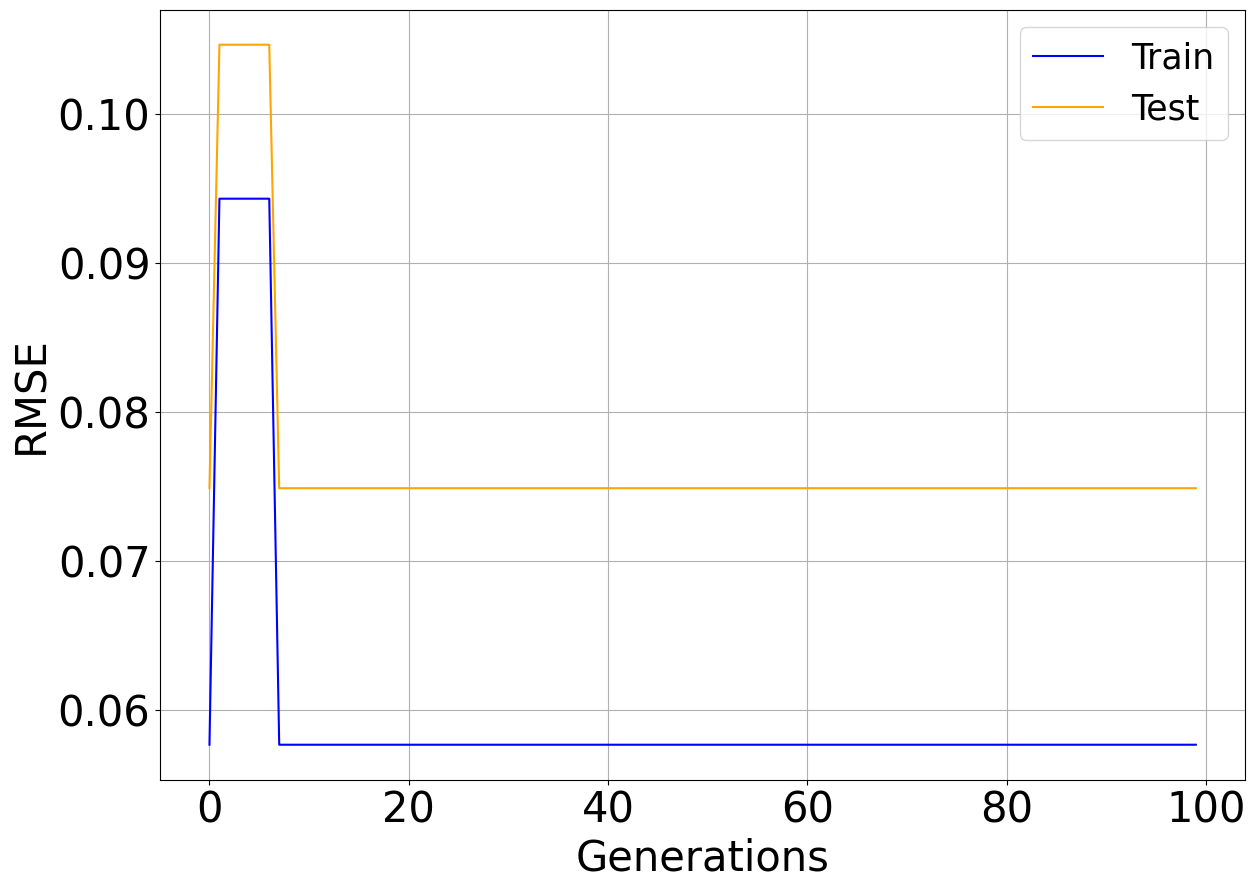

In [18]:
plt.figure(figsize=(14, 10))
plt.plot(generations, rmse_train, label='Train', color='blue')
plt.plot(generations, rmse_test, label='Test', color='orange')
plt.xlabel('Generations', fontsize=30)
plt.ylabel('RMSE', fontsize=30)
plt.legend(fontsize=25)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.savefig('RMSE.png') 